In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import os, sys

In [34]:
print(os.getcwd())
import glob
Agent_1_interaction_data_files = glob.glob('../SHARCNET/Results/PLA_LED_2000epoch/2019-06-28-135630/log/*.csv')
Agent_1_interaction_data_files.sort()
Agent_1_interaction_data_files

F:\unity_simulator\unity_simulator\notebook


['../SHARCNET/Results/PLA_LED_2000epoch/2019-06-28-135630/log\\2019-06-28.csv',
 '../SHARCNET/Results/PLA_LED_2000epoch/2019-06-28-135630/log\\2019-06-29.csv']

In [35]:
Agent_1_interaction_data = {}
for file in Agent_1_interaction_data_files:
    Agent_1_interaction_data[file] = pd.read_csv(file, header=None)
    Agent_1_interaction_data[file].columns = ['Time','Observation','Action','Reward']
    def convert_str_to_matrix(data):
        # remove '\r\n', '[', ']', then split with ' '
        temp_list = data.replace('\n', '').replace('[','').replace(']','').split(' ')
        return np.array([float(item) for item in temp_list if item != ''])
    Agent_1_interaction_data[file]['Observation'] = Agent_1_interaction_data[file]['Observation'].apply(convert_str_to_matrix)
    Agent_1_interaction_data[file]['Action'] = Agent_1_interaction_data[file]['Action'].apply(convert_str_to_matrix)
    print(Agent_1_interaction_data[file].shape)

(112940, 4)
(87060, 4)


In [36]:
Agent_1_interaction_data_all = {}
Agent_1_interaction_data_all['data'] = pd.DataFrame()
Agent_1_interaction_data_all['separate_line'] = []
Agent_1_interaction_data_all['date'] = []
for key in Agent_1_interaction_data.keys():
    Agent_1_interaction_data_all['data'] = pd.concat([Agent_1_interaction_data_all['data'], Agent_1_interaction_data[key]])
    Agent_1_interaction_data_all['separate_line'].append(len(Agent_1_interaction_data[key]))
    Agent_1_interaction_data_all['date'].append(key.split('/')[2].split('-')[0])

In [37]:

# Convert action into np.array
Agent_1_action = np.array(Agent_1_interaction_data_all['data']['Action'].tolist())
# read action_space_name
action_space_name = pd.read_csv('action_space_name_pla.csv')

Agent_1_action_df = pd.DataFrame(Agent_1_action, columns = action_space_name['actuator_name'])
Agent_1_action_df.shape

(200000, 11)

In [38]:
Agent_1_action_df

actuator_name,led_ru,led_ho,led_rd,moth_ru,moth_ho,moth_rd,I_max,ml_gap,sma_gap,n_gap,t_sma
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.760316,0.862054,0.511812,0.856034,0.085726,-0.352216,0.659879,-0.615354,0.613045,0.971791,-0.353338
2,0.760316,0.862054,0.511812,0.856034,0.085726,-0.352216,0.659879,-0.615354,0.613045,0.971791,-0.353338
3,0.760316,0.862054,0.511812,0.856034,0.085726,-0.352216,0.659879,-0.615354,0.613045,0.971791,-0.353338
4,0.760316,0.862054,0.511812,0.856034,0.085726,-0.352216,0.659879,-0.615354,0.613045,0.971791,-0.353338
5,0.760316,0.862054,0.511812,0.856034,0.085726,-0.352216,0.659879,-0.615354,0.613045,0.971791,-0.353338
6,0.760316,0.862054,0.511812,0.856034,0.085726,-0.352216,0.659879,-0.615354,0.613045,0.971791,-0.353338
7,0.760316,0.862054,0.511812,0.856034,0.085726,-0.352216,0.659879,-0.615354,0.613045,0.971791,-0.353338
8,0.760316,0.862054,0.511812,0.856034,0.085726,-0.352216,0.659879,-0.615354,0.613045,0.971791,-0.353338
9,0.760316,0.862054,0.511812,0.856034,0.085726,-0.352216,0.659879,-0.615354,0.613045,0.971791,-0.353338


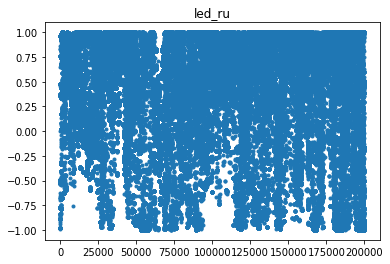

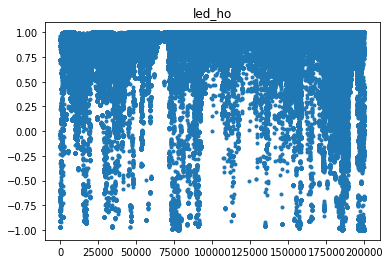

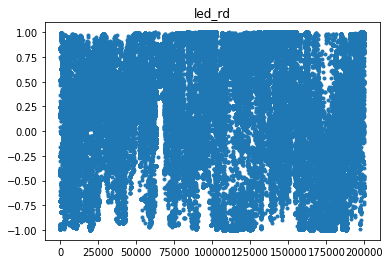

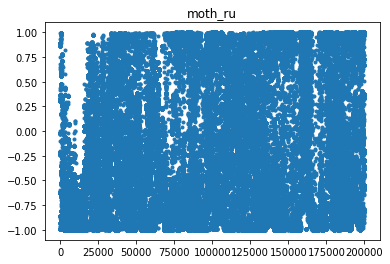

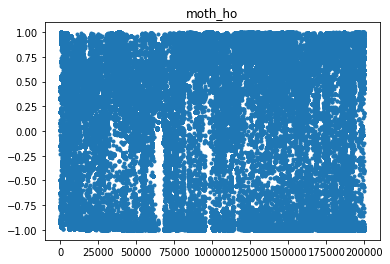

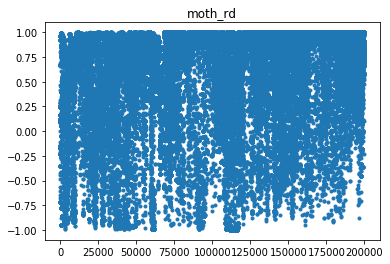

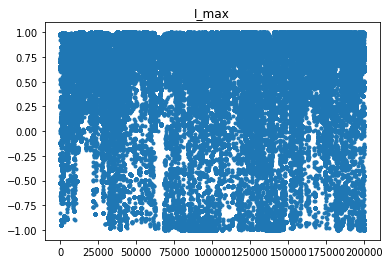

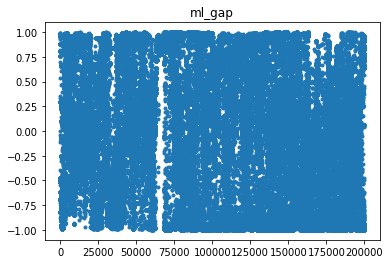

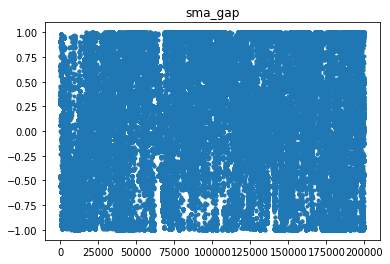

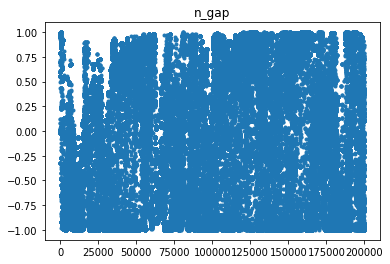

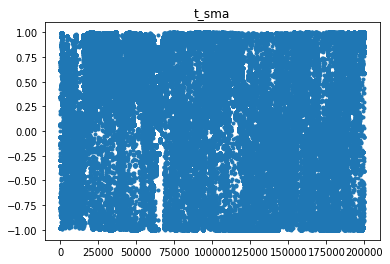

In [39]:
for col in Agent_1_action_df.columns:
    plt.figure()
    plt.plot(Agent_1_action_df.index, Agent_1_action_df[col],'.')
    plt.title(col)
    

In [40]:
Agent_1_action_df.index

RangeIndex(start=0, stop=200000, step=1)

## Visitor's location

In [2]:
import re
# Process log
f_in = open("../SHARCNET/Results/PLA_LED_2000epoch/2019-07-06-003733/s_single_PLA16878158.out", "r")

f_out = open("../SHARCNET/Results/PLA_LED_2000epoch/2019-07-06-003733/visitor_log.csv","w")
cnt = 0
# skip lines in the header
for _ in range(300):
    line = f_in.readline()
    if 'Loading' in line:
        cnt += 1
    if cnt >= 25:
        break;
        
# save into CSV
f_out.write("Time,Location_x,Location_y,Location_z,Destination_x,Destination_y,Destination_z,Distance,Speed\n")
for line in f_in:
    if line.strip():
        # not empty line    
        x = re.search("^\d+(\.\d{1,2})", line)
        if x is not None:
            f_out.write(line.replace('(','').replace(')',''))
        
f_in.close()
f_out.close()

In [3]:
visitor_data = pd.read_csv("../SHARCNET/Results/PLA_LED_2000epoch/2019-07-06-003733/visitor_log.csv", sep=',')


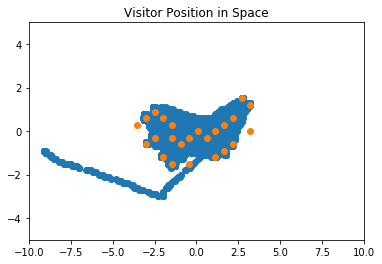

In [8]:
nodes_position = pd.read_csv("NodePosition.csv")

plt.scatter(visitor_data['Location_x'], visitor_data['Location_z'])
plt.xlim([-10,10])
plt.ylim([-5,5])
plt.title("Visitor Position in Space")
plt.scatter(nodes_position['x'], nodes_position['z'])

In [5]:
resolution = (10,10)
bins_x = np.linspace(-10,10,resolution[0]+1)
bins_z = np.linspace(-5,5,resolution[1]+1)
x_discretized = pd.cut(visitor_data['Location_x'],bins=bins_x,labels=np.linspace(0,resolution[0]-1,resolution[0],dtype=np.int32))
z_discretized = pd.cut(visitor_data['Location_z'],bins=bins_z,labels=np.linspace(0,resolution[0]-1,resolution[0],dtype=np.int32))

In [6]:
activity_map = np.zeros(resolution)
for i in range(len(x_discretized)):
    position = (x_discretized[i],z_discretized[i])
    activity_map[position] += 1

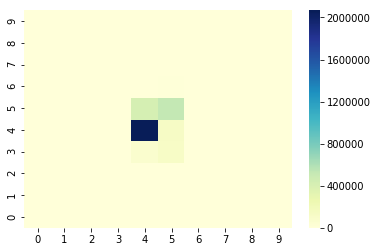

In [9]:
import seaborn

ax = seaborn.heatmap(activity_map, cmap="YlGnBu")
ax.invert_yaxis()